In [15]:
def function1(input1):
    return input1 + " from first function"

In [16]:
def function2(input2):
    return input2 + " from second function"

In [17]:
def function3(input3):
    pass

In [20]:
function1("samrat")

'samrat from first function'

In [21]:
function2("joy of being a developer")

'joy of being a developer from second function'

In [22]:
from langgraph.graph import Graph

In [23]:
workflow1=Graph()

In [24]:
workflow1.add_node("fun1",function1)

In [25]:
workflow1.add_node("fun2",function2)

In [26]:
workflow1.add_edge("fun1","fun2")

In [27]:
workflow1.set_entry_point("fun1")

In [28]:
workflow1.set_finish_point("fun2")

In [29]:
app=workflow1.compile()

In [30]:
app.get_graph()

Graph(nodes={'fun1': Node(id='fun1', name='fun1', data=fun1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'fun2': Node(id='fun2', name='fun2', data=fun2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__start__': Node(id='__start__', name='__start__', data=None, metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='fun1', data=None, conditional=False), Edge(source='fun1', target='fun2', data=None, conditional=False), Edge(source='fun2', target='__end__', data=None, conditional=False)])

In [31]:
from IPython.display import Image, display

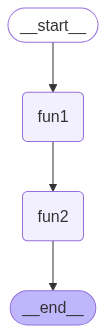

In [32]:
display(Image(app.get_graph().draw_mermaid_png()))

In [35]:
app.invoke("hi this is samrat kar")

'hi this is samrat kar from first function from second function'

In [36]:
for output in app.stream("hi this is rohit"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")
    

here is output from fun1
_______
hi this is rohit from first function


here is output from fun2
_______
hi this is rohit from first function from second function




In [37]:
 from langchain_google_genai import ChatGoogleGenerativeAI
model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')

In [38]:
model.invoke("hi").content

'Hi there! How can I help you today?'

In [39]:
def llm(input):
    from langchain_google_genai import ChatGoogleGenerativeAI
    model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
    output=model.invoke(input)
    return output.content

In [40]:
def token_counter(input):
    token=input.split()
    token_number=len(token)
    return f"total token number in the generated answer is {token_number}"

In [41]:
workflow2=Graph()

In [42]:
workflow2.add_node("My_LLM",llm)

In [43]:
workflow2.add_node("LLM_Output_Token_Counter",token_counter)

In [44]:
workflow2.add_edge("My_LLM","LLM_Output_Token_Counter")

In [45]:
workflow2.set_entry_point("My_LLM")

In [46]:
workflow2.set_finish_point("LLM_Output_Token_Counter")

In [47]:
app=workflow2.compile()

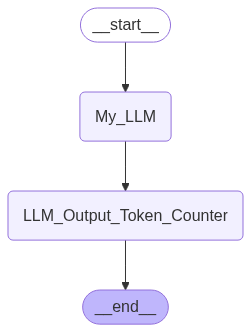

In [48]:
display(Image(app.get_graph().draw_mermaid_png()))

In [49]:
app.invoke("can you tell me about the india's capital?")

'total token number in the generated answer is 122'

In [50]:
app.invoke("tell me about the tata enterpirse in very detail.")

'total token number in the generated answer is 644'

In [51]:
for output in app.stream("tell me about the tata enterpirse in very detail."):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from My_LLM
_______
Tata Enterprises, more accurately referred to as the **Tata Group**, is a massive Indian multinational conglomerate headquartered in Mumbai.  It's not a single entity but a network of over 100 operating companies under the umbrella of Tata Sons, the holding company.  Understanding the Tata Group requires appreciating its unique structure, history, and philosophy.

**I. Structure and Ownership:**

The Tata Group's structure is complex and decentralized.  While Tata Sons acts as the holding company, it doesn't directly control the operations of individual companies.  Instead, it holds significant minority stakes and appoints board members, influencing strategic direction but allowing considerable autonomy to individual companies.  This structure promotes both scale and flexibility.  The ownership is primarily held through trusts, notably the Sir Dorabji Tata Trust and Sir Ratan Tata Trust, ensuring long-term vision and commitment to social responsibilit

In [115]:
from langchain_openai import ChatOpenAI
model=ChatOpenAI(model='gpt-3.5-turbo')
output = model.invoke("can you tell me about the india's capital?")
print(output.content)

India's capital is New Delhi. It is located in the northern part of the country and serves as the seat of the Indian government. New Delhi is a bustling metropolis known for its historic landmarks, cultural institutions, and government buildings. It is also home to many important monuments such as the India Gate, Lotus Temple, and the Rashtrapati Bhavan (the official residence of the President of India). New Delhi is considered to be one of India's most important cities and is a major center for politics, commerce, and culture.


In [116]:
# configuring the embedding model
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(
    model_name="BAAI/bge-small-en"
)

c:\Users\samra\anaconda3\envs\agentic_2_base\Lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [5]:
len(embeddings.embed_query("hello world"))

384

In [159]:
import operator
from typing import List
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,END

In [12]:
loader=DirectoryLoader("../data2",glob="./*.txt",loader_cls=TextLoader)
docs=loader.load()

In [13]:
docs

[Document(metadata={'source': '..\\data2\\usa.txt'}, page_content="🇺🇸 Overview of the U.S. Economy\nThe United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.\n\nU.S. GDP – Size, Composition, and Global Share\nAs of 2024, the United States’ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 25% of the global economy. It ranks #1 in the world by nominal GDP, far ahead of China (which ra

In [14]:
docs[0].page_content

"🇺🇸 Overview of the U.S. Economy\nThe United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.\n\nU.S. GDP – Size, Composition, and Global Share\nAs of 2024, the United States’ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 25% of the global economy. It ranks #1 in the world by nominal GDP, far ahead of China (which ranks 2nd). The U.S. GDP per capita is also among the highest, hover

In [15]:
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=50
)

In [16]:
new_docs=text_splitter.split_documents(documents=docs)

In [17]:
new_docs

[Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='🇺🇸 Overview of the U.S. Economy'),
 Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='The United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy,'),
 Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a'),
 Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services.'),
 Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='innovation, global trade,

In [18]:
doc_string=[doc.page_content for doc in new_docs]
doc_string

['🇺🇸 Overview of the U.S. Economy',
 'The United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy,',
 'It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a',
 'a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services.',
 'innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.',
 'U.S. GDP – Size, Composition, and Global Share',
 'As of 2024, the United States’ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 

In [19]:
len(doc_string)

55

In [23]:
db=Chroma.from_documents(new_docs,embeddings)

In [24]:
## creation of pydantic class
retriever=db.as_retriever(search_kwargs={"k": 3})

In [25]:
retriever.invoke("industrial growth of usa?")

[Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='Looking forward, the U.S. economy is expected to grow at a moderate pace, powered by innovation in AI, green energy, robotics, biotech, and quantum computing. The Biden administration’s Inflation'),
 Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='🇺🇸 Overview of the U.S. Economy'),
 Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='The U.S. economy remains the engine of global growth, backed by unmatched innovation, financial dominance, and a strong institutional framework. Its $28 trillion GDP and influence over global')]

In [26]:
from pydantic import BaseModel, Field

In [28]:
# pydantic class 
class TopicSelectionParser(BaseModel):
    topic: str = Field(description ="The topic to be selected for the workflow")
    reasoning: str = Field(description="The reasoning behind the topic selection")


In [39]:
from langchain.output_parsers import PydanticOutputParser
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
import operator

In [32]:
parser = PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [33]:
parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"topic": {"description": "The topic to be selected for the workflow", "title": "Topic", "type": "string"}, "reasoning": {"description": "The reasoning behind the topic selection", "title": "Reasoning", "type": "string"}}, "required": ["topic", "reasoning"]}\n```'

In [ ]:
# this agent state class we are using inside the state graph
class AgentState(TypedDict):
    message: Annotated[Sequence[BaseMessage], operator.add]

In [55]:
agent_state = AgentState(message=[])

In [56]:
agent_state["message"].append("hi how are you?")
agent_state["message"].append("what are you doing?")
agent_state["message"].append("i am also fine")

In [57]:
agent_state

{'message': ['hi how are you?', 'what are you doing?', 'i am also fine']}

In [58]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [59]:
print (agent_state["message"][0])
print (agent_state["message"][1])
print (agent_state["message"][2])


hi how are you?
what are you doing?
i am also fine


In [114]:
def function_1(state:AgentState):
    question=state["messages"][-1]
    print(f"function_1 is called with question: {question}")
    template = """
    Your task is to classify the given user query into  one of the following categories : [USA, Not Related].
    Only respond with the category name.
    
    User query: {question}
    {format_instructions}
    """
    prompt = PromptTemplate(
        template=template,
        input_variables=["question"],
        partial_variables={"format_instructions": parser.get_format_instructions()}
    )
    
    chain = prompt | model | parser 
    response = chain.invoke({"question": question})
    print ("Parsed response:", response)
    return {"messages":[response.topic]}

In [118]:
state={"messages":["what is a today weather?"]}

In [119]:
function_1(state)

function_1 is called with question: what is a today weather?
Parsed response: topic='Not Related' reasoning='The user query is not related to the USA.'


{'messages': ['Not Related']}

In [120]:
state={"messages":["what is a GDP of usa??"]}

In [121]:
function_1(state)

function_1 is called with question: what is a GDP of usa??
Parsed response: topic='USA' reasoning="The user query specifically mentions 'USA' which indicates a clear relevance to the category"


{'messages': ['USA']}

In [124]:
class TopicSelectionParser(BaseModel):
    Topic:str=Field(description="selected topic")
    Reasoning:str=Field(description='Reasoning behind topic selection')

In [125]:
def router(state:AgentState):
    print ("-> ROUTER -> ")

    last_message = state["messages"][-1]
    print (f"Last message: {last_message}")

    if "usa" in last_message.lower():
        return "RAG Call"
    else:
        return "LLM Call"
    

In [126]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [127]:
# RAG Function
def function_2(state:AgentState):
    print("-> RAG Call ->")
    
    question = state["messages"][0]
    
    prompt=PromptTemplate(
        template="""You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:""",
        
        input_variables=['context', 'question']
    )
    
    rag_chain = (
        {"context": retriever | format_docs, "question": RunnablePassthrough()}
        | prompt
        | model
        | StrOutputParser()
    )
    result = rag_chain.invoke(question)
    return  {"messages": [result]}

In [128]:
# LLM Function
def function_3(state:AgentState):
    print("-> LLM Call ->")
    question = state["messages"][0]
    
    # Normal LLM call
    complete_query = "Anwer the follow question with you knowledge of the real world. Following is the user question: " + question
    response = model.invoke(complete_query)
    return {"messages": [response.content]}

In [133]:
from langgraph.graph import StateGraph,END

In [134]:
workflow=StateGraph(AgentState)

In [135]:
workflow.add_node("Supervisor",function_1)

In [136]:
workflow.add_node("RAG",function_2)

In [137]:
workflow.add_node("LLM",function_3)

In [138]:
workflow.set_entry_point("Supervisor")

In [139]:
workflow.add_conditional_edges(
    "Supervisor", 
    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM"
    }
)    

In [151]:
workflow.add_edge("RAG", END)
workflow.add_edge("LLM", END)

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [152]:
app=workflow.compile()

In [153]:
state={"messages":["hi"]}

In [154]:
app.invoke(state)

function_1 is called with question: hi
Parsed response: topic='Not Related' reasoning='The user query does not provide any specific information related to a topic or category.'
-> ROUTER -> 
Last message: Not Related
-> LLM Call ->


{'messages': ['hi', 'Not Related', 'Hello! How can I help you today?']}

In [155]:
state={"messages":["what is a gdp of usa?"]}

In [160]:
app.invoke(state)

function_1 is called with question: what is a gdp of usa?
Parsed response: topic='USA' reasoning='The user query specifically mentions USA, indicating the topic is related to the country.'
-> ROUTER -> 
Last message: USA
-> RAG Call ->


{'messages': ['what is a gdp of usa?',
  'USA',
  'The GDP of the USA is estimated to be around $28 trillion USD as of 2024, making up about 25% of the global economy. The United States ranks #1 in the world by nominal GDP.']}

In [161]:
state={"messages":["can you tell me the industrial growth of world's most powerful economy?"]}

In [162]:
state={"messages":["can you tell me the industrial growth of world's poor economy?"]}

In [163]:
result=app.invoke(state)

function_1 is called with question: can you tell me the industrial growth of world's poor economy?
Parsed response: topic='Not Related' reasoning='The user query is not related to the category of USA.'
-> ROUTER -> 
Last message: Not Related
-> LLM Call ->


In [164]:
result["messages"][-1]

"I apologize, but I do not have access to real-time data or specific figures on the industrial growth of the world's poor economies. However, it is generally known that the industrial growth of poorer countries and regions can vary significantly depending on factors such as government policies, infrastructure, access to resources, and global economic conditions. Many developing countries have seen significant industrial growth in recent years, driven by factors such as foreign investment, technological advancements, and increased exports. It is recommended to consult official sources and reports from organizations such as the World Bank or the International Monetary Fund for more detailed and up-to-date information on the industrial growth of the world's poor economies."

### Assignment 4
1. create one supervisor 
2. create one router function
3. Create three more nodes.
   3.1 llm call (llm node)
   3.2 RAG (rag node)
   3.3 web scrapping (web scraping node) 
4. create one more node after this for validation for validation of generated output. --> explore how to do the validation.
5. if validation fails, again to go the supervisor and then supervisor node. the supervisor node again decides what needs to be done next
6. once validation passed,  only then  generate the final output. 

### Next class 
1. React Agent with multiple tools
2. Agentic RAG